<a href="https://colab.research.google.com/github/OdysseusPolymetis/ariane_classes/blob/main/1_premier_TAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Premières expériences de Traitement Automatique de la Langue</center>

Vous allez maintenant apprendre à faire du traitement automatique de base. Pour ce faire, nous utiliserons **spaCy**, pas très léger et pas très rapide, mais plutôt efficace (même s'il y a mieux).

Même si normalement le module a bien été installé sur les ordinateurs, il faut s'assurer que le module spaCy soit bien présent. Pour ce faire, il faut ouvrir un terminal et lancer la commande `pip install spacy`. Si le module est déjà installé, le terminal vous le dira.

Il vous faut ensuite importer le module dans le carnet (lui dire où piocher ses fonctions).

In [2]:
import spacy

Nous allons aussi utiliser, plus tard, un module qui nous servira pour créer une représentation graphique, appelé **matplolib**. Vous pouvez, là encore, l'importer avec `pip install matplotlib`.
<br>Lorsque vous importez un module, vous pouvez lui donner un nom plus simple, comme ici matplotlib, qui est très souvent surnommé `plt`.
<br>La ligne suivante configure la taille du grahique produit par défaut.

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]

Nous chargeons ensuite le modèle de langue que nous allons utiliser, en l'occurrence le français.
<br>Là encore, le modèle doit être chargé par avance, en exécutant cette commande en terminal : <br><center>`python -m spacy download fr`</center>
<br>Attention, cette commande ne marche que si `python` est par défaut la version de python 3. Si vous avez aussi python 2 sur votre ordinateur, vous devez exécuter la commande suivante : <br><center>`python3 -m spacy download fr`</center>
<br>Ici, pas besoin, on va le faire directement dans le code.
<br>Vous pouvez ensuite charger le modèle de langue souhaité, soit comme ça :

In [4]:
!python -m spacy download fr_core_news_sm
nlp = spacy.load('fr_core_news_sm')

2023-11-08 14:20:21.283244: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 14:20:21.283323: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 14:20:21.283373: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-08 14:20:22.733211: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 50.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


Nous chargeons ensuite un document (ici une chaîne de caractères, ou "string"), à analyser. Il s'agit de la préface de 1862 des <i>Misérables</i>. Le "u" au début hors des guillemets sert à signaler que nous voulons que la chaîne soit en unicode.

In [5]:
miserables=u'Tant qu’il existera, par le fait des lois et des mœurs, une damnation sociale créant artificiellement, en pleine civilisation, des enfers, et compliquant d’une fatalité humaine la destinée qui est divine ; tant que les trois problèmes du siècle, la dégradation de l’homme par le prolétariat, la déchéance de la femme par la faim, l’atrophie de l’enfant par la nuit, ne seront pas résolus ; tant que, dans de certaines régions, l’asphyxie sociale sera possible ; en d’autres termes, et à un point de vue plus étendu encore, tant qu’il y aura sur la terre ignorance et misère, des livres de la nature de celui-ci pourront ne pas être inutiles.'
doc = nlp(miserables)

Je veux par exemple écrire tout le texte. SpaCy va stocker l'ensemble des information d'un token dans la variable "token", qui comporte différentes caractéristiques (text, lemma_, pos_, etc.). Nous allons utiliser une boucle pour parcourir l'ensemble des données stockées par spaCy dans la variable `doc`.

In [ ]:
for token in doc:
    print(token.text)

Je peux faire la même chose avec les lemmes,

In [ ]:
for token in doc:
    print(token.lemma_)

ou avec les étiquettes de nature :

In [ ]:
for token in doc:
    print(token.pos_)

ou les trois :

In [ ]:
for token in doc:
    print(token.text+" "+token.lemma_+" "+token.pos_)

Mettons maintenant que je veuille savoir quelle est la proportion des noms, verbes, adjectifs, etc. dans un texte. Et que je veuille le représenter graphiquement.
<br>Je vais d'abord compter le nombre d'éléments dans chaque catégorie, comme ça :

In [7]:
advs=0
nouns=0
vbs=0
adjs=0
conjs=0
for token in doc:
    if token.pos_ == "ADV":
        advs+=1
    elif token.pos_ == "NOUN":
        nouns+=1
    elif token.pos_ == "VERB":
        vbs+=1
    elif token.pos_ == "ADJ":
        adjs+=1
    elif token.pos_ == "SCONJ":
        conjs+=1

Maintenant, les variables `advs`, `nouns`, `vbs` etc. comportent toutes le nombre absolu d'éléments présents dans le texte.
<br>Mais je veux obtenir une proportion, donc je vais faire un simple produit en croix, pour obtenir le pourcentage de chaque élément.
<br>Je vais stocker le pourcentage de chaque élément dans une liste, appelée `parts`.

In [8]:
total_len=nouns+vbs+adjs+conjs+advs
nNames=(nouns*100)/total_len
nVerbs=(vbs*100)/total_len
nAdjectives=(adjs*100)/total_len
nConj=(conjs*100)/total_len
nAdverbs=(advs*100)/total_len
parts=[nNames,nVerbs,nConj,nAdjectives,nAdverbs]

Enfin je vais créer le graphique en camembert, avec la librairie matplotlib renommée `plt`. Je vais pour cela donner des noms à mes éléments (les légender), et leur attribuer une couleur.
<br>Je peux aussi, avec la valeur de `explode`, une liste qui comporte pour chaque élément soit 1 soit 0, demander à ce qu'une partie du camembert soit détachée du reste. Je peux aussi déterminer l'angle de démarrage du camembert (`startangle`), ou dire si je veux du relief (`shadow`, paramètre qui est soit `True` soit `False`).
<br>Enfin, je demande à matplotlib de me montrer le résultat avec `show()`.

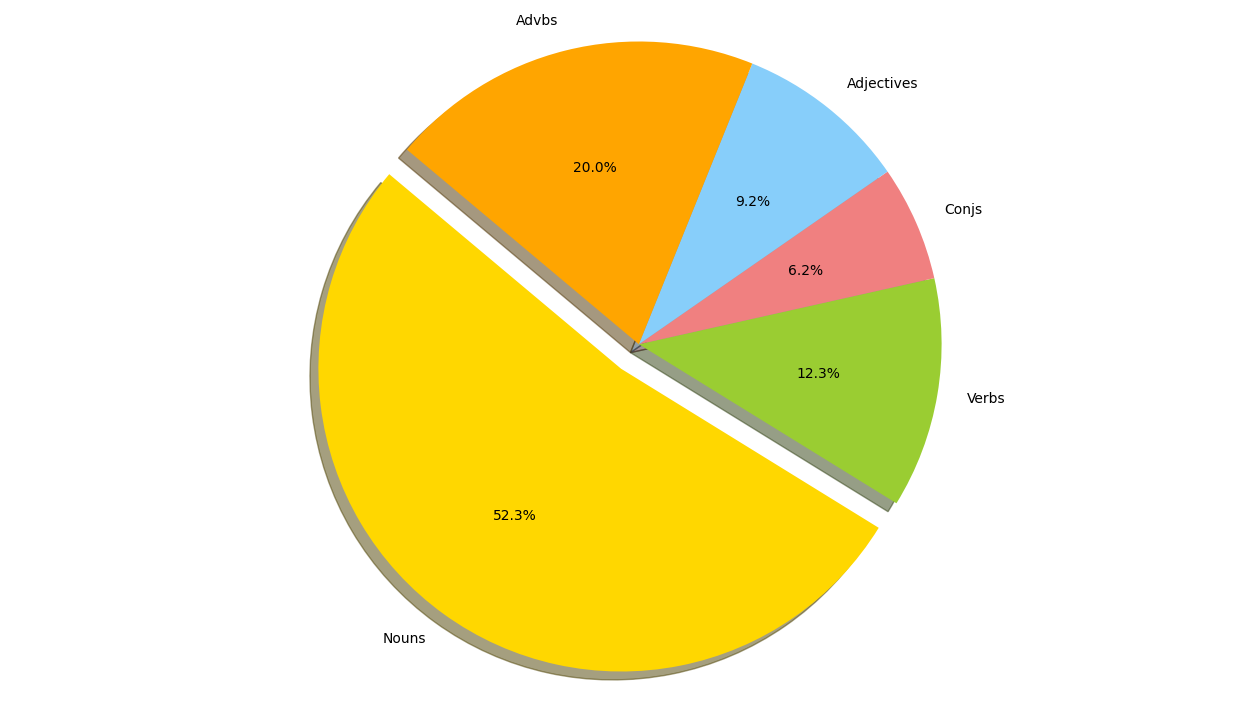

In [9]:
labels = 'Nouns','Verbs','Conjs','Adjectives','Advbs'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
explode = (0.1, 0, 0,0,0 )
plt.pie(parts, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()